# Sentiment Analysis on News Headlines with Python’s Natural Language Toolkit (NLTK)

Edited By: Jia Xin
Date : 31 Oct 2019
    
 In this document, we aim to extract the sentiment of the archived news headliner using NLTK's Vader package. The package used Lexicon and rule based model to classify sentiment of a text into 3 classes, positive (1), negative (-1) and neutral (0). Thru this excercise, we hope to observe both the strengths and weaknesses of this model. 

In [44]:
# Load the required package 

from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

The dataset is taken from a combination of kaggle, bbc, google news and reuters RSS feed. The data is saved in csv form. We load it in using pandas. 

In [45]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
data = pd.read_csv("tweets1.csv") 
#data = pd.read_csv("date_headline.csv")

In [46]:
# Preview the first 5 lines of the loaded data 
data.head()

,Content,author,published_date
0,Meanwhile in KL.. #singapore pic.twitter.com/h...,Tawfik Daud,"Sat, 08 Feb 2020 09:21:31 GMT"
1,Read this! The #healthcare workers battling th...,Claude &nbsp;📝,"Sat, 08 Feb 2020 05:07:28 GMT"
2,#coronavirus Update: My Worldwide Case CountJu...,IndoPacific News,"Sat, 15 Feb 2020 03:03:27 GMT"
3,#Singapore is the most infected country outsid...,Learn from Data,"Tue, 11 Feb 2020 00:54:51 GMT"
4,So this is the situation at NTUC FairPrice JEM...,Amz⁷,"Sat, 08 Feb 2020 00:55:14 GMT"


We import nltk vader = sentiment intensity analyser. This function enable us to quickly determine the general sentiment of a text. There is no aspect mining involved, and it is soley built using lexicon and rule based model. 

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in data['Content']:
    pol_score = sia.polarity_scores(line)
    pol_score['Content'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'Content': 'Meanwhile in KL.. #singapore pic.twitter.com/h5vO4PVi0r',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'Content': 'Read this! The #healthcare workers battling the #coronavirus on the frontline are '
             'HUMANS too! They deserved our utmost respect & not ostracised by the society. '
             '#coronavirussingapore #Singapore #Thoughts pic.twitter.com/nM6I3qmQdq',
  'compound': 0.3786,
  'neg': 0.066,
  'neu': 0.818,
  'pos': 0.116},
 {'Content': '#coronavirus Update: My Worldwide Case CountJust updated: New cases in #Japan, '
             '#Singapore & #EgyptMany new cases & deaths in #ChinaNote: #China is likely '
             'downplaying the numbers#WuhanCoronavirus  #CoronavirusOutbreak#COVID19   '
             '#WuhanPneumonia pic.twitter.com/qnS14B4vEI',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [36]:
line

'Not really a fan of him as a politician, per se. But as a ninety-four-years-old human being, Tun Mahathir is just amazingly exceptional.This is the very same man during his graduation at King Edward VII College of Medicine Singapore, 67 years ago. https://t.co/MHanJSYCZE pic.twitter.com/OdDzE8XMZv'

In [48]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,Content
0,0.000,1.000,0.000,0.0000,Meanwhile in KL.. #singapore pic.twitter.com/h...
1,0.066,0.818,0.116,0.3786,Read this! The #healthcare workers battling th...
2,0.000,1.000,0.000,0.0000,#coronavirus Update: My Worldwide Case CountJu...
3,0.132,0.868,0.000,-0.5413,#Singapore is the most infected country outsid...
4,0.032,0.873,0.095,0.5267,So this is the situation at NTUC FairPrice JEM...


In [50]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,Content,label
0,0.000,1.000,0.000,0.0000,Meanwhile in KL.. #singapore pic.twitter.com/h...,0
1,0.066,0.818,0.116,0.3786,Read this! The #healthcare workers battling th...,1
2,0.000,1.000,0.000,0.0000,#coronavirus Update: My Worldwide Case CountJu...,0
3,0.132,0.868,0.000,-0.5413,#Singapore is the most infected country outsid...,-1
4,0.032,0.873,0.095,0.5267,So this is the situation at NTUC FairPrice JEM...,1


In [51]:
df2 = df[['Content', 'label']]

In [52]:
df3 = df[['Content', 'label', 'compound']]

In [53]:
df3

,Content,label,compound
0,Meanwhile in KL.. #singapore pic.twitter.com/h...,0,0.0000
1,Read this! The #healthcare workers battling th...,1,0.3786
2,#coronavirus Update: My Worldwide Case CountJu...,0,0.0000
3,#Singapore is the most infected country outsid...,-1,-0.5413
4,So this is the situation at NTUC FairPrice JEM...,1,0.5267
5,Why are all the people so kiasu go and sweep a...,1,0.7269
6,Why condoms also sold out in Singapore? 😂 #sin...,0,0.0000
7,This is the correct way to dispose your used m...,0,0.0000
8,Some kind soul has been giving away masks and ...,1,0.7003
9,Check out this “Polite” baggage system at Chan...,0,0.0000


In [54]:
df3.to_csv('tweets_labels2.csv', mode='a', encoding='utf-8', index=False)

In [43]:
df.label.value_counts()

 0    288
-1    186
 1    164
Name: label, dtype: int64

In [55]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:



AttributeError: 'DataFrame' object has no attribute 'headline'

In [56]:
df.label.value_counts(normalize=True) * 100

 0    45.141066
-1    29.153605
 1    25.705329
Name: label, dtype: float64

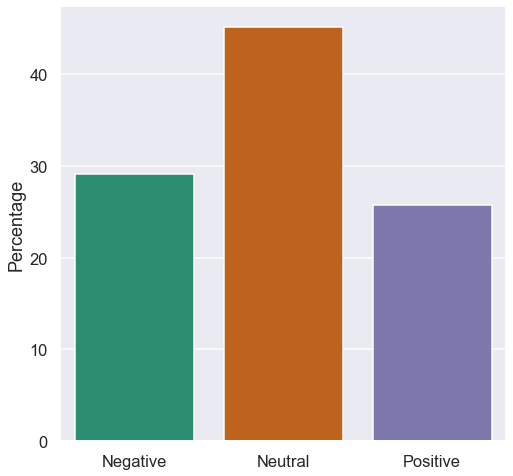

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

## Visualisation for Sentiment Analysis 

In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
train  = pd.read_csv('reuter_headlines_labels1.csv')

In [ ]:
train.head()

In [ ]:
# remove special characters, numbers, punctuations
train['headline'] = train['headline'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
# tokenisation 
tokenized_line = train['headline'].apply(lambda x: x.split())
tokenized_line.head()

Using the code below, we will study the word cloud for negative and postive sentiment texts. Before we could do any word cloud, we are required to tokenise, quick clean and remove stopwords. 

In [ ]:
all_words = ' '.join([text for text in train['headline']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
neg_words =' '.join([text for text in train['headline'][train['label'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

In [ ]:
normal_words =' '.join([text for text in train['headline'][train['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, background_color ='white', stopwords = stopwords, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from stanfordnlp.server import CoreNLPClient

In [ ]:
text="Trump faces severe suburban slump"

In [ ]:
text